In [3]:
import pandas as pd 
import datetime 
pd.options.display.max_rows = 100

In [4]:
df = pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-total-announced-deaths-23-May-2020.xlsx", sheet_name="Tab4 Deaths by trust", skiprows=15, usecols="B:EA")
df = pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-total-announced-deaths-30-May-2020.xlsx", sheet_name="Tab4 Deaths by trust", skiprows=15, usecols="B:EA")

cols = list(df.columns)
cols = [c for c in cols if "Unnamed:" not in str(c)]
df = df[cols]

df = df.loc[:, "NHS England Region":"Total"]
df = df.iloc[2:, :]



dt_cols = [c for c in cols if type(c) == datetime.datetime]
other_cols = [c for c in cols if type(c) != datetime.datetime]

df = df.melt(id_vars = other_cols, value_vars=dt_cols)


df = df.sort_values(["Name", "variable"])
df["rs"] = df.groupby('Name')['value'].rolling(7).sum().reset_index(0,drop=True)
df.head(20)




,NHS England Region,Code,Name,Up to 01-Mar-20,Awaiting verification,Total,variable,value,rs
101,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-01,0.0,NaN
317,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-02,0.0,NaN
533,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-03,0.0,NaN
749,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-04,0.0,NaN
965,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-05,0.0,NaN
1181,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-06,0.0,NaN
1397,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-07,0.0,0.0
1613,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-08,0.0,0.0
1829,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-09,0.0,0.0
2045,North East and Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,105.0,2020-03-10,0.0,0.0


In [5]:
len(df)

19440

In [6]:
import altair as alt

f1 = df["Name"].str.lower().str.contains("oxford university")
f2 = df["Name"].str.lower().str.contains("west hertfordshire")
f3 = df["Name"].str.lower().str.contains("cambridge university")

df.loc[f1|f2|f3, "highlight"] = "yes"
df.loc[~(f1|f2|f3), "highlight"] = "no"

In [7]:
df2 = df[f1|f2|f3]


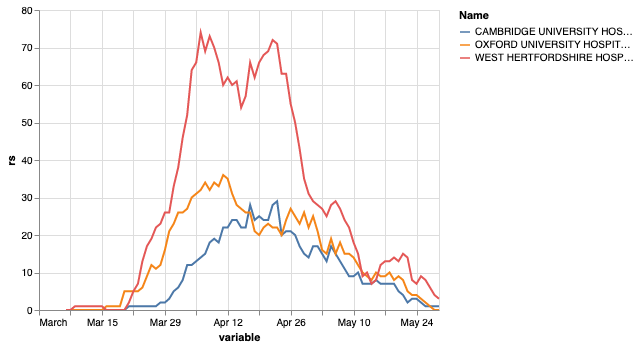

In [8]:
alt.Chart(df2).mark_line().encode(
    x='variable',
    y='rs',
    color='Name',
    tooltip=['Name', "variable", "rs"]
)

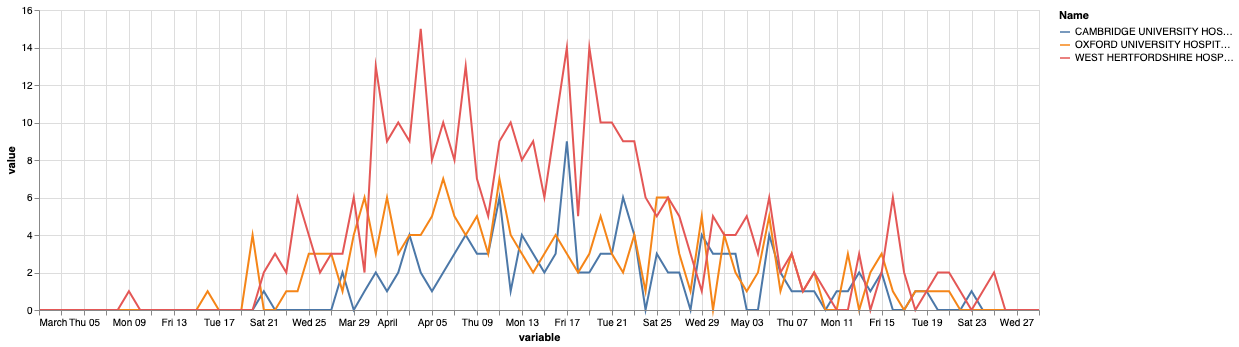

In [9]:
alt.Chart(df2).mark_line().encode(
    x='variable',
    y='value',
    color='Name',
    tooltip=['Name', "variable", "value"]
).properties(width=1000)

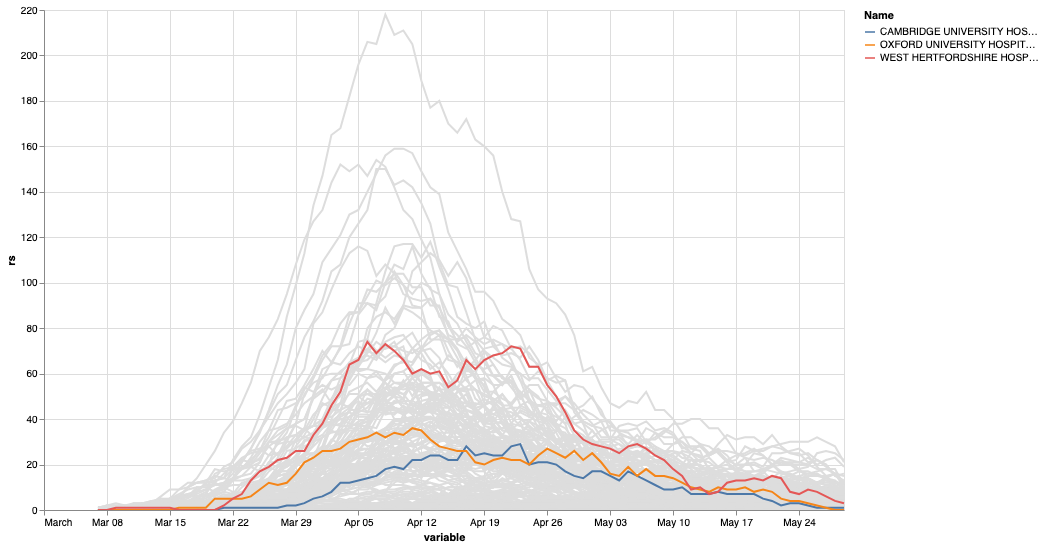

In [13]:
alt.data_transformers.enable('json')
c1 = alt.Chart(df).mark_line().encode(
    x='variable',
    y='rs',
    color=alt.Color('Name',  scale=None),
    tooltip=['Name', "variable", "rs"]
)

c2 = alt.Chart(df2).mark_line().encode(
    x='variable',
    y='rs',
    color='Name',
    tooltip=['Name', "variable", "rs"]
)

c3 = (c1 + c2).properties(height=500, width=800)

c3

In [17]:
with alt.data_transformers.enable('default'):
    c3.save('chart.png')


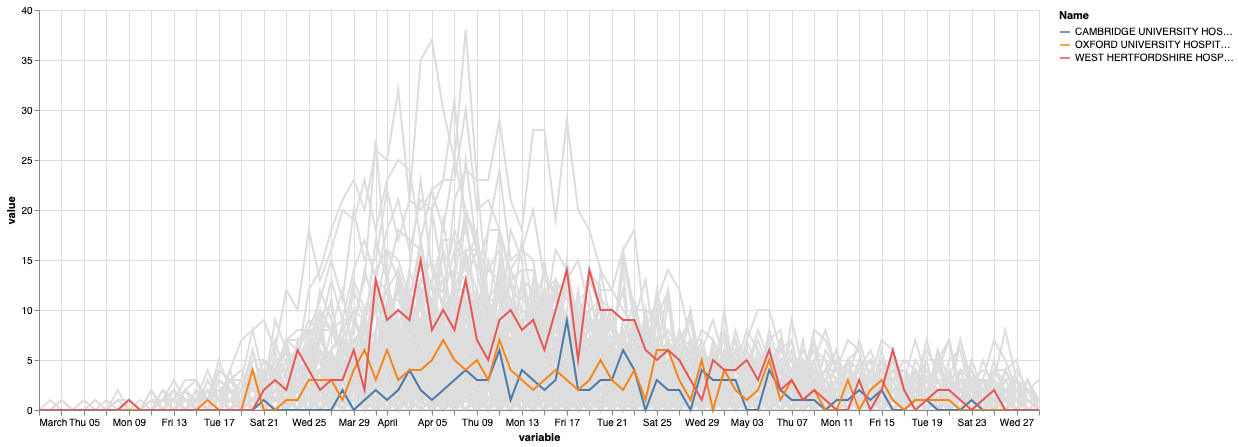

In [11]:
alt.data_transformers.enable('json')
c1 = alt.Chart(df).mark_line().encode(
    x='variable',
    y='value',
    color=alt.Color('Name',  scale=None),
    tooltip=['Name', "variable", "value"]
)

c2 = alt.Chart(df2).mark_line().encode(
    x='variable',
    y='value',
    color='Name',
    tooltip=['Name', "variable", "value"]
)

(c1 + c2).properties(height=400, width=1000)